### **Import Library**

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### **Data Loading**

In [22]:
training_file = './gts-dataset/train.p'
testing_file = './gts-dataset/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Data Loaded!")

Data Loaded!


### **Eksplorasi Data**

In [23]:
## Buat pandas dataframe untuk load data csv
## File csv ini berupa ClassId dan SignName
 
sign_name_df = pd.read_csv('./gts-dataset/signnames.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [24]:
# Definisikan fitur dan label untuk data training
X, y = train['features'], train['labels']
 
# Mengubah lists menjadi numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)
 
# Definisikan fitur dan label untuk data testing
X_test, y_test = test['features'], test['labels']
 
# Mengubah lists menjadi numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)


In [25]:
# Split training data into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


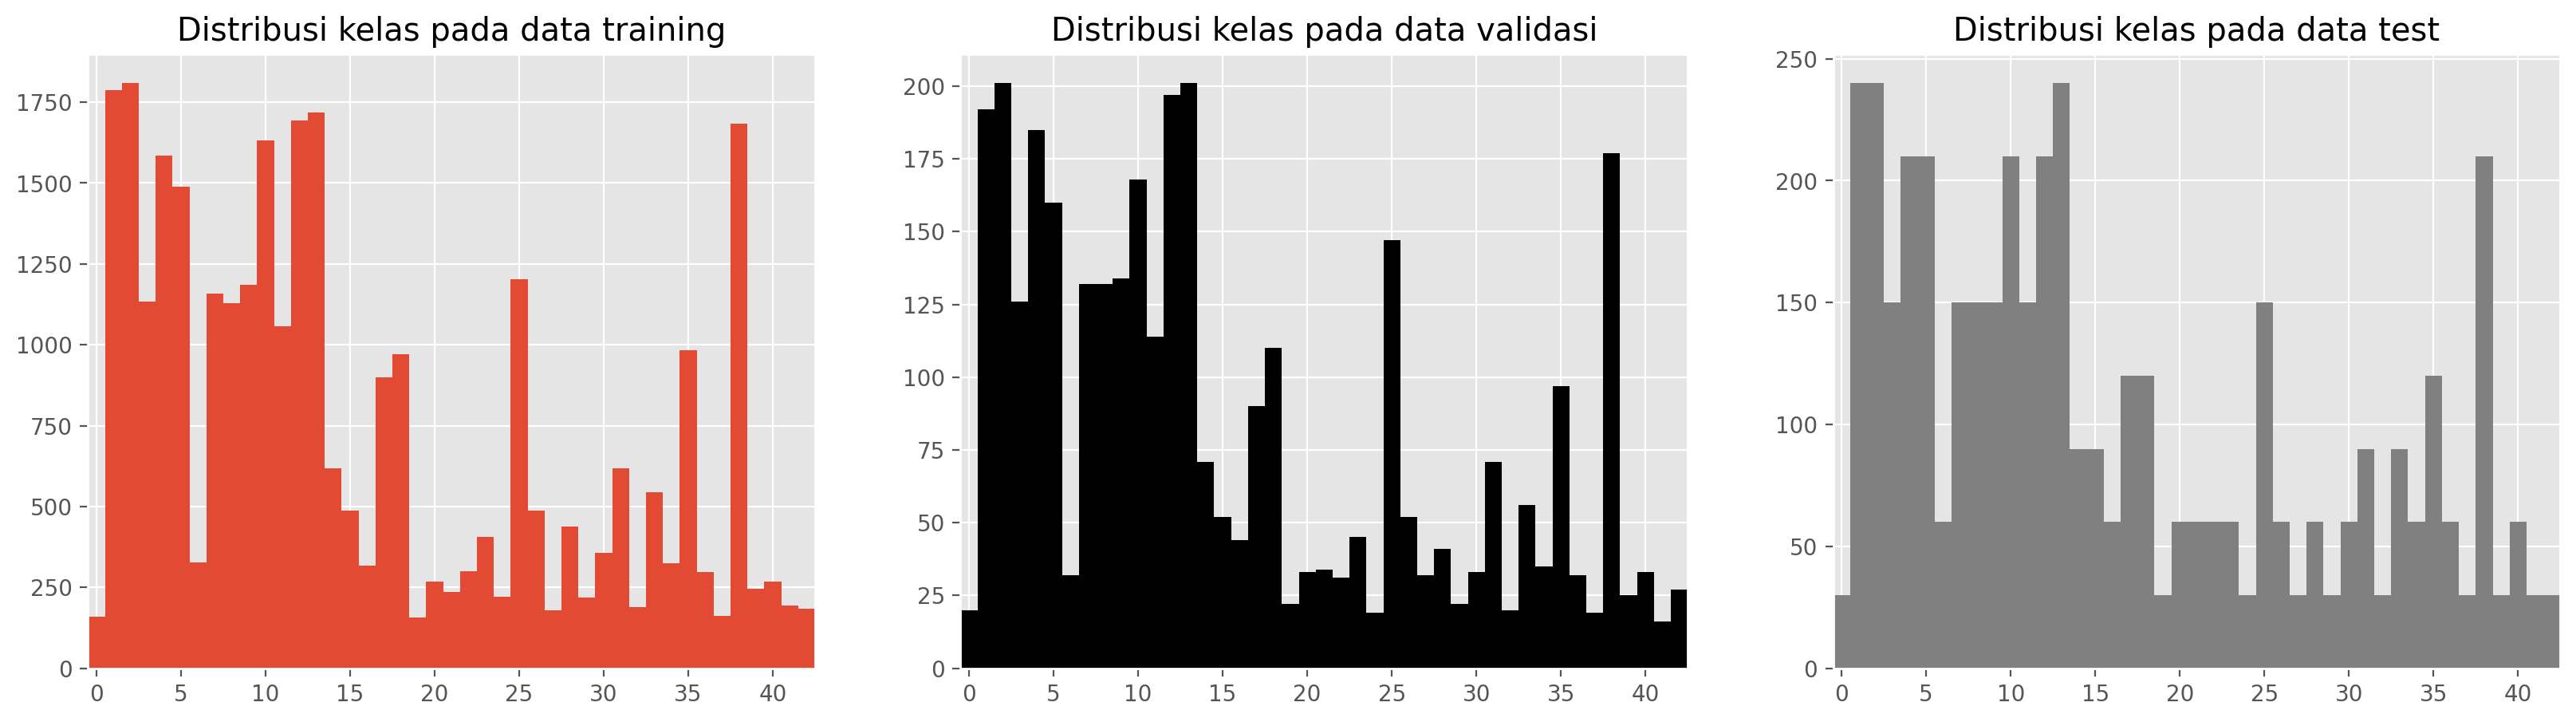

In [26]:
# Visualisasi distribusi data training

n_labels = np.unique(y_train).size
def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)
        
fig,ax = plt.subplots(1,3, figsize=(20,5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

In [27]:
# Konversi label dengan teknik one hot encoding
from tensorflow.keras.utils import to_categorical
 
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

### **Training**

In [28]:
# callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi telah mencapai >96%. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

- Lapisan Convolutional (konvolusi) akan menghitung perkalian (dot product) antara kernel dan sub-array dari gambar input yang berukuran sama dengan kernel. Sebagai contoh pada gambar berikut kita menggunakan kernel berukuran 3x3 dan melakukan proses perkalian antara kernel dan sub-array pada gambar masukan.
- RELU atau Rectified Linear Activation Unit merupakan fungsi aktivasi linear untuk jaringan saraf tiruan. Ia telah menjadi fungsi aktivasi default karena model yang menggunakannya mencapai kinerja lebih baik dengan cepat. Nah, jika weighted sum ini bernilai positif, RELU akan mengembalikan nilainya secara langsung. Sebaliknya, jika nilainya negatif, RELU akan menghasilkan nilai nol. RELU didefinisikan sebagai:
- Lapisan Pooling akan melakukan downsampling pada shape suatu gambar sehingga mengakibatkan pengurangan dimensi gambar. Tujuannya adalah agar data komputasi yang dibutuhkan untuk memproses citra menjadi berkurang. Pooling layer terdiri dari dua jenis, average pooling dan max pooling. Pada max pooling, setiap area dengan luas piksel tertentu akan diambil satu buah piksel yang memiliki nilai tertinggi. Sementara pada average pooling, nilai yang diambil adalah nilai rata-rata dari suatu area kernel. Namun, max pooling memiliki kinerja lebih baik dibanding dengan average pooling. Oleh karena itu, max pooling lebih sering digunakan pada proses training CNN. 
- Lapisan FC (Fully-Connected) akan menghitung skor kelas untuk setiap kategori klasifikasi. Lapisan ini sama dengan jaringan saraf di mana setiap neuron terhubung ke semua neuron pada lapisan secara berurutan. Output akhir dihitung menggunakan softmax yang memberikan probabilitas setiap kelas untuk fitur yang diberikan.
- Lapisan dropout merupakan salah satu hyperparameter yang bertujuan untuk mengurangi overfitting. Ia bekerja dengan memutus atau menjatuhkan (drop) unit selama proses training neural network sehingga layer atau lapisannya menjadi tidak aktif. Berdasarkan dokumentasi dari Keras, argumen rate untuk dropout adalah tipe data float antara 0 dan 1, yang merupakan bagian dari unit yang akan di-drop. 

In [29]:
# Set layer pertama
print(X_train.shape[1:])

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Set layer kedua
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FC layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.summary()

(32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                          

In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])
model.save("my_model.h5")

Epoch 1/25


979/979 [==============================] - 13s 12ms/step - loss: 1.9851 - accuracy: 0.4848 - val_loss: 0.6152 - val_accuracy: 0.8566
Epoch 2/25
979/979 [==============================] - 12s 12ms/step - loss: 0.7447 - accuracy: 0.7784 - val_loss: 0.2786 - val_accuracy: 0.9305
Epoch 3/25
979/979 [==============================] - 12s 12ms/step - loss: 0.4766 - accuracy: 0.8582 - val_loss: 0.1488 - val_accuracy: 0.9575
Epoch 4/25
979/979 [==============================] - 13s 13ms/step - loss: 0.3464 - accuracy: 0.8983 - val_loss: 0.1278 - val_accuracy: 0.9661
Epoch 5/25
979/979 [==============================] - 11s 11ms/step - loss: 0.2568 - accuracy: 0.9241 - val_loss: 0.0786 - val_accuracy: 0.9793
Epoch 6/25
979/979 [==============================] - 13s 13ms/step - loss: 0.2399 - accuracy: 0.9292 - val_loss: 0.0669 - val_accuracy: 0.9836
Epoch 7/25
979/979 [==============================] - 12s 12ms/step - loss: 0.2257 - accuracy: 0.9351 - val_loss: 0.0614 - val_accurac

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Evaluasi**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


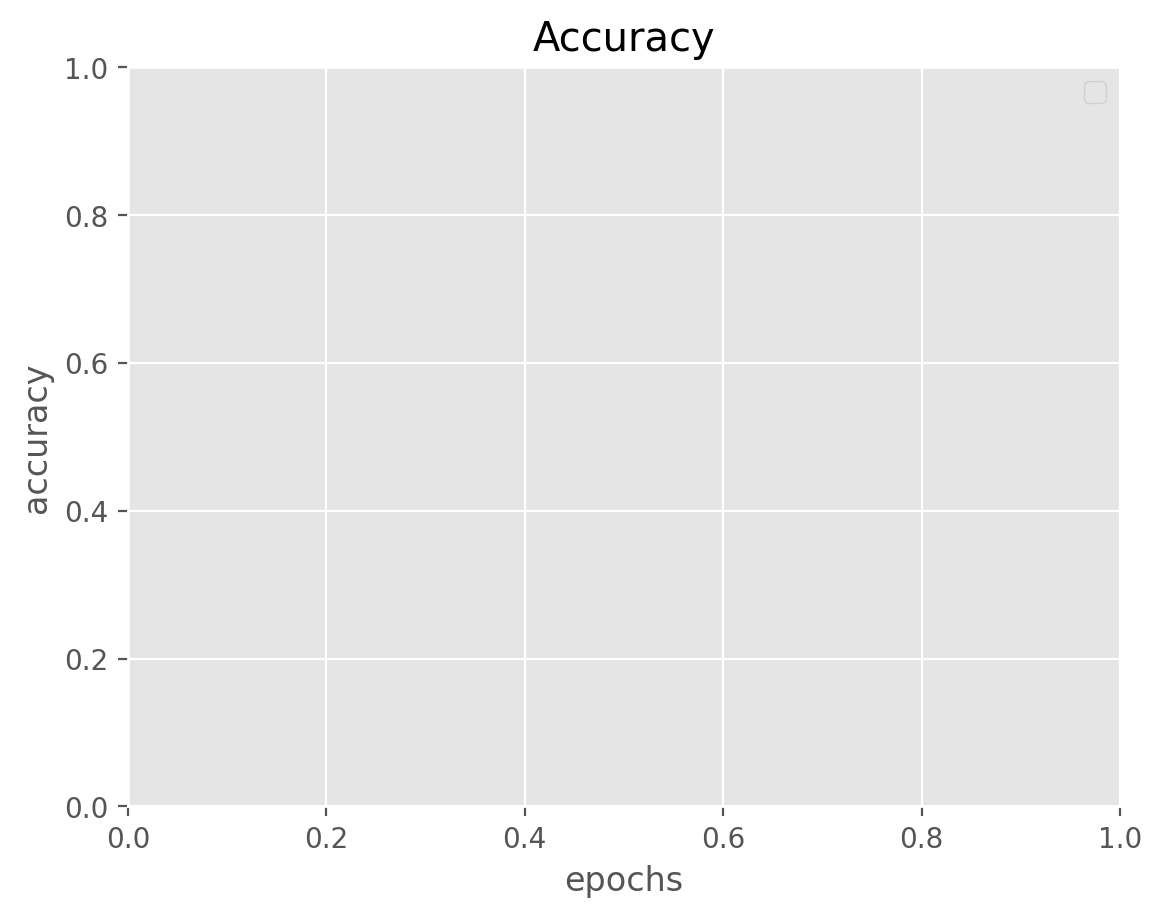

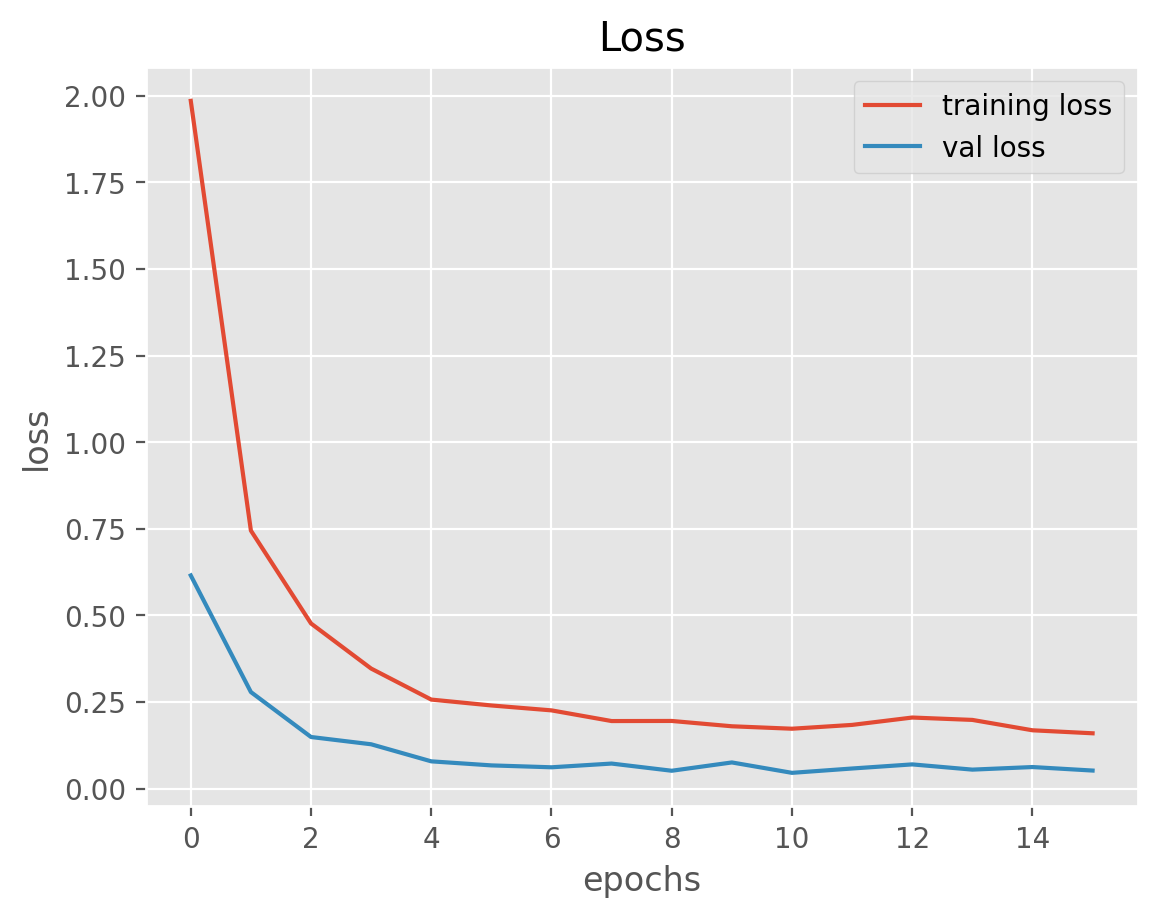

In [31]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
# Testing accuracy with the test data
from sklearn.metrics import accuracy_score
 
pred=np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

138/138 [==============================] - 1s 4ms/step


0.971655328798186

In [33]:
# Calculate metrics for classification
from sklearn.metrics import classification_report
 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.98      0.95      0.97       240
           2       0.98      0.97      0.98       240
           3       0.99      0.99      0.99       150
           4       0.95      1.00      0.97       210
           5       0.98      0.97      0.97       210
           6       0.95      1.00      0.98        60
           7       0.95      1.00      0.97       150
           8       0.96      0.93      0.95       150
           9       1.00      1.00      1.00       150
          10       1.00      1.00      1.00       210
          11       0.99      0.98      0.99       150
          12       0.88      1.00      0.93       210
          13       1.00      0.99      0.99       240
          14       1.00      1.00      1.00        90
          15       0.97      1.00      0.98        90
          16       1.00      1.00      1.00        60
          17       1.00    